# Model: Artificial Neural Network

## Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc
# from sklearn.feature_selection import RFE
# from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


from keras.models import Sequential
from keras.layers import Dense

In [3]:
# Read from CSV file
df = pd.read_csv('cleaned_data.csv')

<hr>

### Splitting of Data Set
- Total records: 70692
- Validation Set: 13% (9190 records)
- Unseen Set: 4% (2830 Records)
- Training and Test set: 83% (58672 Records)

In [4]:
X = df.drop('Diabetes_binary', axis=1) # features
y = df['Diabetes_binary']

# Split the dataset into training and test sets
training_set, test_set, y_train, test_labels = train_test_split(X, y, test_size=0.13, random_state=424, shuffle=True)

# Split the training set into validation and remaining training sets
training_set, validation_set, y_train, validation_labels = train_test_split(training_set, y_train, test_size=0.1131, random_state=424, shuffle=True)

# Split the remaining training set into an unseen set
training_set, unseen_set, train_labels, unseen_labels = train_test_split(training_set, y_train, test_size=0.0296, random_state=424, shuffle=True)


In [5]:
remaining_data, val_data = train_test_split(df, test_size=0.13, random_state=424, shuffle=True)
print(df.shape)
print(val_data.shape)

train_test_data, unseen_data = train_test_split(remaining_data, test_size=0.046, random_state=424, shuffle=True)
print(unseen_data.shape)
print(train_test_data.shape)


# Train test data - train_test_data
# Validation data - unseen_data

(70692, 23)
(9190, 23)
(2830, 23)
(58672, 23)


In [5]:
train_test_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_bins
35092,0.0,0.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3.0,5.0,0.0,0.0,0.0,8.0,5.0,5.0,3
48613,1.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,0.0,3.0,30.0,5.0,0.0,1.0,11.0,4.0,1.0,1
70651,1.0,0.0,1.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,0.0,3.0,0.0,1.0,5.0,6.0,2.0,3
5900,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0,2
44692,1.0,1.0,1.0,1.0,35.0,0.0,0.0,0.0,1.0,1.0,...,0.0,3.0,2.0,0.0,0.0,0.0,7.0,4.0,5.0,3


In [6]:
val_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_bins
38170,1.0,0.0,0.0,1.0,33.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,0.0,5.0,5.0,1.0,3
26096,0.0,0.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,0.0,3.0,3.0,3.0,1.0,0.0,10.0,6.0,7.0,3
29923,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,8.0,6.0,8.0,1
68491,1.0,1.0,1.0,1.0,21.0,0.0,0.0,1.0,1.0,0.0,...,1.0,4.0,15.0,20.0,0.0,1.0,5.0,5.0,1.0,1
40501,1.0,1.0,0.0,1.0,45.0,1.0,0.0,1.0,0.0,1.0,...,0.0,2.0,7.0,0.0,0.0,0.0,7.0,4.0,7.0,3


In [7]:
val_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_bins
38170,1.0,0.0,0.0,1.0,33.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,0.0,5.0,5.0,1.0,3
26096,0.0,0.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,0.0,3.0,3.0,3.0,1.0,0.0,10.0,6.0,7.0,3
29923,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,8.0,6.0,8.0,1
68491,1.0,1.0,1.0,1.0,21.0,0.0,0.0,1.0,1.0,0.0,...,1.0,4.0,15.0,20.0,0.0,1.0,5.0,5.0,1.0,1
40501,1.0,1.0,0.0,1.0,45.0,1.0,0.0,1.0,0.0,1.0,...,0.0,2.0,7.0,0.0,0.0,0.0,7.0,4.0,7.0,3


- training_set : train_labels
- test_set : test_labels
- validation_set : validation_labels
- unseen_set : unseen_labels

<hr>

### Correlation Coefficient Results
This variables have more correlated with the target variable Diabetes_binary - Greater than 0.25
- Diabetes_binary and HighBP have a correlation coefficient of 0.3815155489073117
- Diabetes_binary and HighChol have a correlation coefficient of 0.28921280708865016
- Diabetes_binary and BMI have a correlation coefficient of 0.29337274476103575
- Diabetes_binary and GenHlth have a correlation coefficient of 0.4076115984949182
- Diabetes_binary and DiffWalk have a correlation coefficient of 0.272646006159808
- Diabetes_binary and Age have a correlation coefficient of 0.27873806628188813
- Diabetes_binary and BMI_bins have a correlation coefficient of 0.2995782127672782

<hr>

## ANN Model Architecture

Code to create a model

In [6]:
def build_ann():
    # Set the random seed to a fixed value for reproducibility 
    np.random.seed(424)
    
    # Build neural network model
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

### Explanation:

Line 6 creates an instance of the Sequential class, to form a feedforward neural network

Line 7 adds a Dense layer with 64 neurons and input no. of dimensions = number of selected features = X.shape[1]. The layer uses the ReLU activation function, which applies the rectified linear unit function to the output of each neuron.

Line 8 adds another Dense layer with 32 neurons, which uses ReLU activation function.

Line 9 is the third and final Dense layer with a single output unit and uses a sigmoid activation function.
Since our variables are binary, the sigmoid function will output a probability between 0 and 1, which can be interpreted as the likelihood of the input belonging to the positive class.

Line 12 configures the learning process of the model, loss function being binary_cross_entropy. This function computes the cross-entropy loss between true labels and predicted labels, best for binary (0 or 1) classification applications.
The optimizer is 'adam', which is an adaptive optimization algorithm that updates the model weights during training.
The metrics parameter determines how the model will be evaluated using the validation set during training, here it is set to 'accuracy'.

<b> Visualization of ANN Architecture </b>

By importing ann_viz library, this is the code to visualize the ANN architechture in an image.

Reference: https://towardsdatascience.com/visualizing-artificial-neural-networks-anns-with-just-one-line-of-code-b4233607209e


In [ ]:
# # Opens a pdf file in the folder with a picture of the ANN Architechture

# !pip install ann_visualizer

# from ann_visualizer.visualize import ann_viz
# ann_viz(model, view=True,filename="ANN Architechture" title="Artificial Neural Network Architechture")

Using plot_model library to visualize ANN Layers - Input, Hidden & Output

Reference: https://datascience.stackexchange.com/questions/12851/how-do-you-visualize-neural-network-architectures

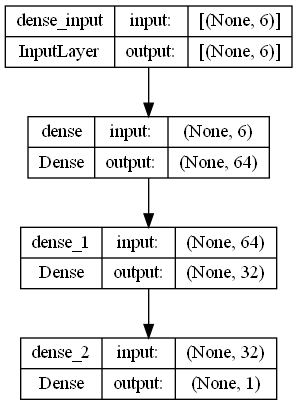

In [13]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

<hr>

## Feature Selection

Run the model based on 3 features selections:

Set 1 - From correlation coefficient <br>
Set 2 - Do not include health features e.g. GenHlth, PhysHlth, DiffWalk <br>
Set 3 - Include GenHlth and DiffWalk

In [7]:
features = ['HighBP', 'GenHlth', 'Age', 'Income', 'BMI_bins', 'HighChol', 'Education']

features2 = ['HighBP', 'HighChol', 'Age', 'BMI_bins', 'Income',   'Education']

features3 = ['HighBP', 'HighChol', 'Age', 'BMI_bins', 'GenHlth', 'DiffWalk'  ]

In [14]:
# SET 1
# Dataset required
X = train_test_data[features]
y = train_test_data["Diabetes_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=424)

# Build and compile ANN model
model = build_ann()

# Fit model to training data
model.fit(X, y, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Predict data
y_pred = model.predict(X_test)

# Convert y_pred from continous to binary
binary_y_pred = np.where(y_pred> 0.5, 1.0, 0.0)

# Calculate sensitivity 
sensitivity1 = metrics.recall_score(y_test, binary_y_pred)
print('The sensitivity of the neural network with set1 is:', sensitivity1)

Epoch 1/100
1834/1834 [==============================] - 3s 1ms/step - loss: 0.5350 - accuracy: 0.7301 - val_loss: 0.5294 - val_accuracy: 0.7340
Epoch 2/100
1834/1834 [==============================] - 3s 1ms/step - loss: 0.5242 - accuracy: 0.7387 - val_loss: 0.5260 - val_accuracy: 0.7334
Epoch 3/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.5216 - accuracy: 0.7416 - val_loss: 0.5217 - val_accuracy: 0.7391
Epoch 4/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.5206 - accuracy: 0.7421 - val_loss: 0.5203 - val_accuracy: 0.7392
Epoch 5/100
1834/1834 [==============================] - 3s 1ms/step - loss: 0.5188 - accuracy: 0.7427 - val_loss: 0.5270 - val_accuracy: 0.7340
Epoch 6/100
1834/1834 [==============================] - 3s 1ms/step - loss: 0.5190 - accuracy: 0.7417 - val_loss: 0.5219 - val_accuracy: 0.7378
Epoch 7/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.5174 - accuracy: 0.7425 - val_loss: 0.5185 - val_ac

In [16]:
# SET 2
# Dataset required
X = train_test_data[features2]
y = train_test_data["Diabetes_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=424)

# Build and compile ANN model
model = build_ann()

# Fit model to training data
model.fit(X, y, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Predict data
y_pred = model.predict(X_test)

# Convert y_pred from continous to binary
binary_y_pred = np.where(y_pred> 0.5, 1.0, 0.0)

# Calculate sensitivity 
sensitivity2 = metrics.recall_score(y_test, binary_y_pred)
print('The sensitivity of the neural network with set2 is:', sensitivity2)

Epoch 1/100
1834/1834 [==============================] - 3s 1ms/step - loss: 0.5607 - accuracy: 0.7135 - val_loss: 0.5534 - val_accuracy: 0.7179
Epoch 2/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.5506 - accuracy: 0.7231 - val_loss: 0.5497 - val_accuracy: 0.7212
Epoch 3/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.5495 - accuracy: 0.7214 - val_loss: 0.5499 - val_accuracy: 0.7218
Epoch 4/100
1834/1834 [==============================] - 3s 1ms/step - loss: 0.5483 - accuracy: 0.7233 - val_loss: 0.5560 - val_accuracy: 0.7197
Epoch 5/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.5483 - accuracy: 0.7226 - val_loss: 0.5499 - val_accuracy: 0.7201
Epoch 6/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.5474 - accuracy: 0.7242 - val_loss: 0.5493 - val_accuracy: 0.7196
Epoch 7/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.5470 - accuracy: 0.7233 - val_loss: 0.5479 - val_ac

In [17]:
# SET 3
# Dataset required
X = train_test_data[features3]
y = train_test_data["Diabetes_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=424)

# Build and compile ANN model
model = build_ann()

# Fit model to training data
model.fit(X, y, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Predict data
y_pred = model.predict(X_test)

# Convert y_pred from continous to binary
binary_y_pred = np.where(y_pred> 0.5, 1.0, 0.0)

# Calculate sensitivity 
sensitivity3 = metrics.recall_score(y_test, binary_y_pred)
print('The sensitivity of the neural network with set3 is:', sensitivity3)

Epoch 1/100
1834/1834 [==============================] - 4s 2ms/step - loss: 0.5445 - accuracy: 0.7265 - val_loss: 0.5254 - val_accuracy: 0.7387
Epoch 2/100
1834/1834 [==============================] - 3s 1ms/step - loss: 0.5219 - accuracy: 0.7405 - val_loss: 0.5439 - val_accuracy: 0.7257
Epoch 3/100
1834/1834 [==============================] - 3s 1ms/step - loss: 0.5205 - accuracy: 0.7422 - val_loss: 0.5206 - val_accuracy: 0.7410
Epoch 4/100
1834/1834 [==============================] - 3s 1ms/step - loss: 0.5194 - accuracy: 0.7420 - val_loss: 0.5230 - val_accuracy: 0.7372
Epoch 5/100
1834/1834 [==============================] - 3s 1ms/step - loss: 0.5190 - accuracy: 0.7430 - val_loss: 0.5194 - val_accuracy: 0.7380
Epoch 6/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.5183 - accuracy: 0.7426 - val_loss: 0.5180 - val_accuracy: 0.7399
Epoch 7/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.5180 - accuracy: 0.7432 - val_loss: 0.5198 - val_ac

In [ ]:
print("The sensitivities of the 3 feature sets is as follows -")
print("Set 1 :", sensitivity1 ")
print("Set 2 :", sensitivity2 ")
print("Set 3 :", sensitivity3 ")

<hr>

## Model Evaluation - Parameter Tuning


##### Variables Used : Top 6 variables based on <u>Correlation Cofficient</u>
['HighBP', 'HighChol', 'GenHlth', 'DiffWalk', 'Age','BMI_bins']

Function below returns performance scores and ROC curve for each model


In [10]:
# Performance Evaluation

def get_performance(X_test,y_test):
    # Fit/predict on test data set
    y_pred = model.predict(X_test)

    # Convert y_pred from continous to binary
    binary_y_pred = np.where(y_pred> 0.5, 1.0, 0.0)

    # -----------------------------------------------------------


    #confusion Matrix
    confusion = metrics.confusion_matrix(y_test, binary_y_pred)

    # Access specific values of confusion matix using [row, column]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]


    # Calculate accuracy 
    accuracy = metrics.accuracy_score(y_test, binary_y_pred)

    # Calculate classification error derived from accuracy (we minus it against 1) 
    classification_error = 1 - accuracy

    # Calculate sensitivity 
    sensitivity = metrics.recall_score(y_test, binary_y_pred)

    # Calculate precision 
    precision = metrics.precision_score(y_test, binary_y_pred)

    # Calculate specificity 
    specificity = TN / (TN + FP)

    # Calculate f1_score
    f1_score = (2 * sensitivity * precision) / (sensitivity + precision)

    #--------------------------------------------------------------------------------------------------

    fpr, tpr, thresholds = roc_curve(y_test, binary_y_pred)
    auc_roc = roc_auc_score(y_test, binary_y_pred)

    #--------------------------------------------------------------------------------------------------
    print('False Positive Rate (FPR):', fpr)
    print('True Positive Rate (TPR):', tpr)
    print('Area Under the ROC Curve (AUC-ROC):', auc_roc)
    print('\n')
    print('The accuracy of the neural network is:', accuracy)
    print('The classification error of the neural network is:', classification_error)
    print('The sensitivity of the neural network is:', sensitivity)
    print('The precision of the neural network is:', precision)
    print('The specificity of the neural network is:', specificity)
    print('The f1 score of the neural network is:', f1_score)
    
    #--------------------------------------------------------------------------------------------------
    # Plot ROC
    
    fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred)

    auc_nn = auc(fpr_nn, tpr_nn)

    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_nn, tpr_nn, label='Neutral Network (area = {:.3f})'.format(auc_nn))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

# Different Loss Functions (categorical_crossentropy, binary_crossentropy)

Categorical crossentropy is not suited for this dataset.

## Model: categorical_crossentropy

In [32]:
# Dataset required
features = ['HighBP', 'HighChol', 'GenHlth', 'DiffWalk', 'Age','BMI_bins']
X = train_test_data[features]
y = train_test_data["Diabetes_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=424)

# Set the random seed to a fixed value for reproducibility 
np.random.seed(424)

# Build neural network model
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
# Fit model to training data
model.fit(X, y, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
1834/1834 [==============================] - 3s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5027
Epoch 2/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5027
Epoch 3/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5027
Epoch 4/100
1834/1834 [==============================] - 3s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5027
Epoch 5/100
1834/1834 [==============================] - 3s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5027
Epoch 6/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5027
Epoch 7/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.000

367/367 [==============================] - 0s 790us/step
False Positive Rate (FPR): [0. 1.]
True Positive Rate (TPR): [0. 1.]
Area Under the ROC Curve (AUC-ROC): 0.5


The accuracy of the neural network is: 0.5026842778014486
The classification error of the neural network is: 0.49731572219855136
The sensitivity of the neural network is: 0.0
The precision of the neural network is: 0.0
The specificity of the neural network is: 1.0
The f1 score of the neural network is: nan


C:\Users\Anirban Ghosh\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-18-70cb2fc5b4f8>:39: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = (2 * sensitivity * precision) / (sensitivity + precision)


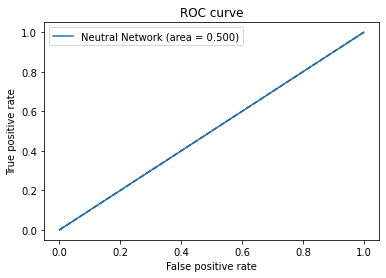

In [34]:
get_performance(X_test,y_test)

###### How does it perform on unseen data?

89/89 [==============================] - 0s 882us/step
False Positive Rate (FPR): [0. 1.]
True Positive Rate (TPR): [0. 1.]
Area Under the ROC Curve (AUC-ROC): 0.5


The accuracy of the neural network is: 0.49681978798586574
The classification error of the neural network is: 0.5031802120141342
The sensitivity of the neural network is: 0.0
The precision of the neural network is: 0.0
The specificity of the neural network is: 1.0
The f1 score of the neural network is: nan


C:\Users\Anirban Ghosh\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-18-70cb2fc5b4f8>:39: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = (2 * sensitivity * precision) / (sensitivity + precision)


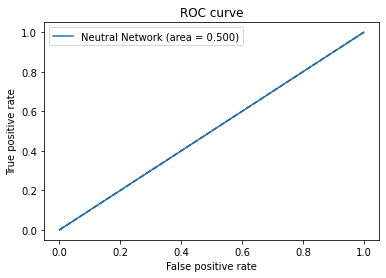

In [35]:
X_unseen = unseen_data[features]
y_unseen = unseen_data["Diabetes_binary"]

get_performance(X_unseen,y_unseen)

# Different Epochs (50, 100, 150)

## Model: epochs=50 , batch_size=32

In [19]:
# Dataset required
features = ['HighBP', 'HighChol', 'GenHlth', 'DiffWalk', 'Age','BMI_bins']
X = train_test_data[features]
y = train_test_data["Diabetes_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=424)

# Build and compile ANN model
model = build_ann()

In [20]:
# Fit model to training data
model.fit(X, y, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
1834/1834 [==============================] - 3s 2ms/step - loss: 0.5460 - accuracy: 0.7245 - val_loss: 0.5316 - val_accuracy: 0.7330
Epoch 2/50
1834/1834 [==============================] - 3s 1ms/step - loss: 0.5217 - accuracy: 0.7405 - val_loss: 0.5216 - val_accuracy: 0.7403
Epoch 3/50
1834/1834 [==============================] - 3s 1ms/step - loss: 0.5208 - accuracy: 0.7412 - val_loss: 0.5190 - val_accuracy: 0.7427
Epoch 4/50
1834/1834 [==============================] - 3s 1ms/step - loss: 0.5193 - accuracy: 0.7421 - val_loss: 0.5218 - val_accuracy: 0.7403
Epoch 5/50
1834/1834 [==============================] - 3s 1ms/step - loss: 0.5186 - accuracy: 0.7430 - val_loss: 0.5188 - val_accuracy: 0.7416
Epoch 6/50
1834/1834 [==============================] - 2s 1ms/step - loss: 0.5188 - accuracy: 0.7416 - val_loss: 0.5189 - val_accuracy: 0.7395
Epoch 7/50
1834/1834 [==============================] - 3s 1ms/step - loss: 0.5186 - accuracy: 0.7410 - val_loss: 0.5189 - val_accuracy:

367/367 [==============================] - 0s 1ms/step
False Positive Rate (FPR): [0.         0.35582302 1.        ]
True Positive Rate (TPR): [0.         0.83516107 1.        ]
Area Under the ROC Curve (AUC-ROC): 0.7396690241872526


The accuracy of the neural network is: 0.7391563698338304
The classification error of the neural network is: 0.2608436301661696
The sensitivity of the neural network is: 0.8351610692254969
The precision of the neural network is: 0.6989817868922988
The specificity of the neural network is: 0.6441769791490083
The f1 score of the neural network is: 0.7610274026075415


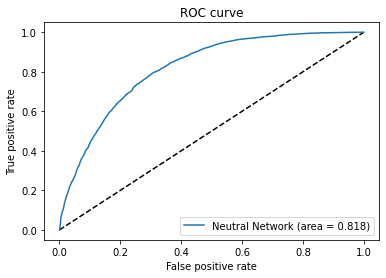

In [21]:
get_performance(X_test,y_test)

###### How does it perform on unseen data?

89/89 [==============================] - 0s 851us/step
False Positive Rate (FPR): [0.        0.3428165 1.       ]
True Positive Rate (TPR): [0.        0.8244382 1.       ]
Area Under the ROC Curve (AUC-ROC): 0.7408108507679767


The accuracy of the neural network is: 0.7413427561837456
The classification error of the neural network is: 0.25865724381625443
The sensitivity of the neural network is: 0.824438202247191
The precision of the neural network is: 0.7089371980676329
The specificity of the neural network is: 0.6571834992887624
The f1 score of the neural network is: 0.7623376623376624


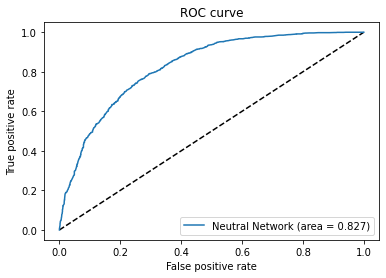

In [22]:
X_unseen = unseen_data[features]
y_unseen = unseen_data["Diabetes_binary"]

get_performance(X_unseen,y_unseen)

## Model: epochs=100 , batch_size=32

(used later to compare with batch_size=64)

In [23]:
# Build and compile ANN model
model = build_ann()

# Fit model to training data - 100 epochs
model.fit(X, y, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
1834/1834 [==============================] - 3s 1ms/step - loss: 0.5467 - accuracy: 0.7238 - val_loss: 0.5224 - val_accuracy: 0.7392
Epoch 2/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.5237 - accuracy: 0.7380 - val_loss: 0.5191 - val_accuracy: 0.7407
Epoch 3/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.5207 - accuracy: 0.7412 - val_loss: 0.5202 - val_accuracy: 0.7420
Epoch 4/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.5194 - accuracy: 0.7428 - val_loss: 0.5246 - val_accuracy: 0.7355
Epoch 5/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.5190 - accuracy: 0.7425 - val_loss: 0.5196 - val_accuracy: 0.7376
Epoch 6/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.5184 - accuracy: 0.7414 - val_loss: 0.5242 - val_accuracy: 0.7342
Epoch 7/100
1834/1834 [==============================] - 3s 1ms/step - loss: 0.5183 - accuracy: 0.7429 - val_loss: 0.5184 - val_ac

367/367 [==============================] - 0s 795us/step
False Positive Rate (FPR): [0.         0.29784709 1.        ]
True Positive Rate (TPR): [0.        0.7823852 1.       ]
Area Under the ROC Curve (AUC-ROC): 0.7422690513058463


The accuracy of the neural network is: 0.742053685556029
The classification error of the neural network is: 0.257946314443971
The sensitivity of the neural network is: 0.7823851953392734
The precision of the neural network is: 0.7221255733038114
The specificity of the neural network is: 0.7021529072724191
The f1 score of the neural network is: 0.7510486059708856


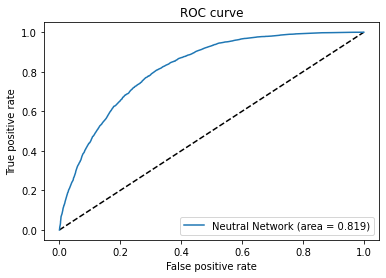

In [24]:
get_performance(X_test,y_test)

###### How does it perform on unseen data?

89/89 [==============================] - 0s 813us/step
False Positive Rate (FPR): [0.         0.27596017 1.        ]
True Positive Rate (TPR): [0.         0.77247191 1.        ]
Area Under the ROC Curve (AUC-ROC): 0.7482558697076734


The accuracy of the neural network is: 0.7484098939929329
The classification error of the neural network is: 0.2515901060070671
The sensitivity of the neural network is: 0.7724719101123596
The precision of the neural network is: 0.739247311827957
The specificity of the neural network is: 0.7240398293029872
The f1 score of the neural network is: 0.7554945054945055


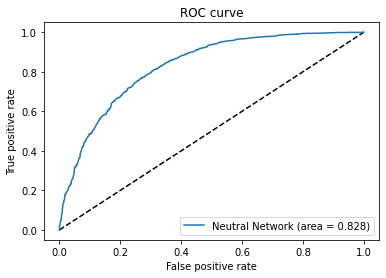

In [25]:
X_unseen = unseen_data[features]
y_unseen = unseen_data["Diabetes_binary"]

get_performance(X_unseen,y_unseen)

## Model: epochs=150 , batch_size=32

As seen below, a neural network with 150 epochs performs ___ compared to the neural network with 100 epochs.

In [26]:
# Build and compile ANN model
model = build_ann()

# Fit model to training data - 150 epochs
model.fit(X, y, epochs=150, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/150
1834/1834 [==============================] - 3s 1ms/step - loss: 0.5503 - accuracy: 0.7219 - val_loss: 0.5249 - val_accuracy: 0.7359
Epoch 2/150
1834/1834 [==============================] - 2s 1ms/step - loss: 0.5217 - accuracy: 0.7412 - val_loss: 0.5231 - val_accuracy: 0.7363
Epoch 3/150
1834/1834 [==============================] - 2s 1ms/step - loss: 0.5201 - accuracy: 0.7415 - val_loss: 0.5206 - val_accuracy: 0.7385
Epoch 4/150
1834/1834 [==============================] - 2s 1ms/step - loss: 0.5197 - accuracy: 0.7414 - val_loss: 0.5190 - val_accuracy: 0.7413
Epoch 5/150
1834/1834 [==============================] - 2s 1ms/step - loss: 0.5198 - accuracy: 0.7412 - val_loss: 0.5189 - val_accuracy: 0.7420
Epoch 6/150
1834/1834 [==============================] - 2s 1ms/step - loss: 0.5187 - accuracy: 0.7433 - val_loss: 0.5201 - val_accuracy: 0.7396
Epoch 7/150
1834/1834 [==============================] - 2s 1ms/step - loss: 0.5180 - accuracy: 0.7435 - val_loss: 0.5184 - val_ac

1834/1834 [==============================] - 3s 1ms/step - loss: 0.5130 - accuracy: 0.7454 - val_loss: 0.5133 - val_accuracy: 0.7442
Epoch 114/150
1834/1834 [==============================] - 3s 2ms/step - loss: 0.5129 - accuracy: 0.7459 - val_loss: 0.5147 - val_accuracy: 0.7438
Epoch 115/150
1834/1834 [==============================] - 3s 1ms/step - loss: 0.5133 - accuracy: 0.7451 - val_loss: 0.5143 - val_accuracy: 0.7435
Epoch 116/150
1834/1834 [==============================] - 3s 1ms/step - loss: 0.5126 - accuracy: 0.7455 - val_loss: 0.5135 - val_accuracy: 0.7432
Epoch 117/150
1834/1834 [==============================] - 3s 2ms/step - loss: 0.5130 - accuracy: 0.7452 - val_loss: 0.5180 - val_accuracy: 0.7398
Epoch 118/150
1834/1834 [==============================] - 3s 1ms/step - loss: 0.5129 - accuracy: 0.7460 - val_loss: 0.5143 - val_accuracy: 0.7426
Epoch 119/150
1834/1834 [==============================] - 2s 1ms/step - loss: 0.5129 - accuracy: 0.7455 - val_loss: 0.5169 - val_ac

367/367 [==============================] - 0s 732us/step
False Positive Rate (FPR): [0.         0.32564841 1.        ]
True Positive Rate (TPR): [0.         0.81357094 1.        ]
Area Under the ROC Curve (AUC-ROC): 0.7439612620068621


The accuracy of the neural network is: 0.7435875585854282
The classification error of the neural network is: 0.25641244141457176
The sensitivity of the neural network is: 0.8135709389993147
The precision of the neural network is: 0.7119508172139751
The specificity of the neural network is: 0.6743515850144092
The f1 score of the neural network is: 0.7593762495002


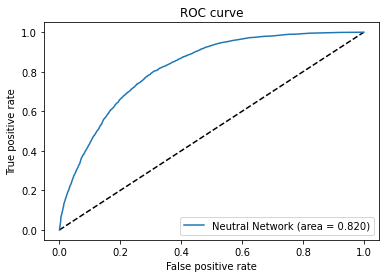

In [27]:
get_performance(X_test,y_test)

###### How does it perform on unseen data?

89/89 [==============================] - 0s 1ms/step
False Positive Rate (FPR): [0.         0.30583215 1.        ]
True Positive Rate (TPR): [0.         0.80547753 1.        ]
Area Under the ROC Curve (AUC-ROC): 0.7498226900762383


The accuracy of the neural network is: 0.7501766784452297
The classification error of the neural network is: 0.24982332155477027
The sensitivity of the neural network is: 0.8054775280898876
The precision of the neural network is: 0.7273303741280913
The specificity of the neural network is: 0.6941678520625889
The f1 score of the neural network is: 0.764411862712429


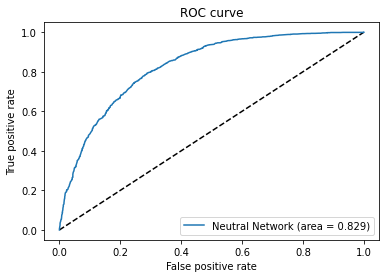

In [28]:
X_unseen = unseen_data[features]
y_unseen = unseen_data["Diabetes_binary"]

get_performance(X_unseen,y_unseen)

# Different Batch Sizes (32, 64)

## Model: epochs=100 , batch_size=32

Refer to earlier code.

## Model: epochs=100 , batch_size=64

In [29]:
# Dataset required
features = ['HighBP', 'HighChol', 'GenHlth', 'DiffWalk', 'Age','BMI_bins']
X = train_test_data[features]
y = train_test_data["Diabetes_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=424)

# Build and compile ANN model
model = build_ann()

# Fit model to training data - 150 epochs
model.fit(X, y, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
917/917 [==============================] - 2s 1ms/step - loss: 0.5617 - accuracy: 0.7147 - val_loss: 0.5268 - val_accuracy: 0.7352
Epoch 2/100
917/917 [==============================] - 1s 1ms/step - loss: 0.5246 - accuracy: 0.7393 - val_loss: 0.5234 - val_accuracy: 0.7354
Epoch 3/100
917/917 [==============================] - 1s 1ms/step - loss: 0.5206 - accuracy: 0.7412 - val_loss: 0.5221 - val_accuracy: 0.7372
Epoch 4/100
917/917 [==============================] - 1s 2ms/step - loss: 0.5196 - accuracy: 0.7415 - val_loss: 0.5190 - val_accuracy: 0.7419
Epoch 5/100
917/917 [==============================] - 1s 1ms/step - loss: 0.5191 - accuracy: 0.7416 - val_loss: 0.5201 - val_accuracy: 0.7398
Epoch 6/100
917/917 [==============================] - 1s 2ms/step - loss: 0.5182 - accuracy: 0.7427 - val_loss: 0.5200 - val_accuracy: 0.7392
Epoch 7/100
917/917 [==============================] - 1s 2ms/step - loss: 0.5182 - accuracy: 0.7423 - val_loss: 0.5184 - val_accuracy: 0.7407

Epoch 58/100
917/917 [==============================] - 1s 1ms/step - loss: 0.5140 - accuracy: 0.7446 - val_loss: 0.5219 - val_accuracy: 0.7378
Epoch 59/100
917/917 [==============================] - 1s 1ms/step - loss: 0.5143 - accuracy: 0.7448 - val_loss: 0.5186 - val_accuracy: 0.7382
Epoch 60/100
917/917 [==============================] - 1s 1ms/step - loss: 0.5139 - accuracy: 0.7438 - val_loss: 0.5152 - val_accuracy: 0.7426
Epoch 61/100
917/917 [==============================] - 1s 1ms/step - loss: 0.5141 - accuracy: 0.7460 - val_loss: 0.5160 - val_accuracy: 0.7398
Epoch 62/100
917/917 [==============================] - 1s 2ms/step - loss: 0.5140 - accuracy: 0.7448 - val_loss: 0.5147 - val_accuracy: 0.7427
Epoch 63/100
917/917 [==============================] - 1s 1ms/step - loss: 0.5138 - accuracy: 0.7444 - val_loss: 0.5151 - val_accuracy: 0.7432
Epoch 64/100
917/917 [==============================] - 1s 2ms/step - loss: 0.5141 - accuracy: 0.7441 - val_loss: 0.5155 - val_accuracy:

367/367 [==============================] - 0s 1ms/step
False Positive Rate (FPR): [0.         0.31106967 1.        ]
True Positive Rate (TPR): [0.         0.79900617 1.        ]
Area Under the ROC Curve (AUC-ROC): 0.7439682478913666


The accuracy of the neural network is: 0.7436727737537282
The classification error of the neural network is: 0.2563272262462718
The sensitivity of the neural network is: 0.799006168608636
The precision of the neural network is: 0.7176054170514005
The specificity of the neural network is: 0.6889303271740973
The f1 score of the neural network is: 0.756121290741041


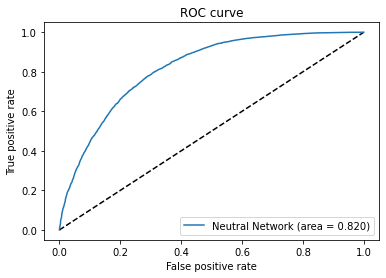

In [30]:
get_performance(X_test,y_test)

###### How does it perform on unseen data?

89/89 [==============================] - 0s 1ms/step
False Positive Rate (FPR): [0.         0.29445235 1.        ]
True Positive Rate (TPR): [0.         0.79353933 1.        ]
Area Under the ROC Curve (AUC-ROC): 0.7495434893793853


The accuracy of the neural network is: 0.7498233215547703
The classification error of the neural network is: 0.2501766784452297
The sensitivity of the neural network is: 0.7935393258426966
The precision of the neural network is: 0.7318652849740933
The specificity of the neural network is: 0.705547652916074
The f1 score of the neural network is: 0.761455525606469


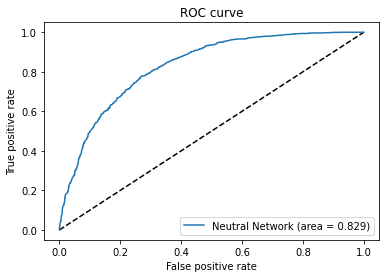

In [31]:
X_unseen = unseen_data[features]
y_unseen = unseen_data["Diabetes_binary"]

get_performance(X_unseen,y_unseen)

## Model: epochs=50 , batch_size=64

In [8]:
# Dataset required
features = ['HighBP', 'HighChol', 'GenHlth', 'DiffWalk', 'Age','BMI_bins']
X = train_test_data[features]
y = train_test_data["Diabetes_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=424)

# Build and compile ANN model
model = build_ann()

# Fit model to training data - 150 epochs
model.fit(X, y, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
917/917 [==============================] - 2s 1ms/step - loss: 0.5547 - accuracy: 0.7198 - val_loss: 0.5299 - val_accuracy: 0.7369
Epoch 2/50
917/917 [==============================] - 1s 1ms/step - loss: 0.5244 - accuracy: 0.7396 - val_loss: 0.5215 - val_accuracy: 0.7382
Epoch 3/50
917/917 [==============================] - 1s 1ms/step - loss: 0.5204 - accuracy: 0.7417 - val_loss: 0.5215 - val_accuracy: 0.7386
Epoch 4/50
917/917 [==============================] - 1s 1ms/step - loss: 0.5208 - accuracy: 0.7400 - val_loss: 0.5205 - val_accuracy: 0.7388
Epoch 5/50
917/917 [==============================] - 1s 1ms/step - loss: 0.5195 - accuracy: 0.7426 - val_loss: 0.5269 - val_accuracy: 0.7349
Epoch 6/50
917/917 [==============================] - 2s 2ms/step - loss: 0.5183 - accuracy: 0.7423 - val_loss: 0.5202 - val_accuracy: 0.7392
Epoch 7/50
917/917 [==============================] - 2s 2ms/step - loss: 0.5183 - accuracy: 0.7425 - val_loss: 0.5193 - val_accuracy: 0.7404
Epoch 

367/367 [==============================] - 2s 737us/step
False Positive Rate (FPR): [0.         0.27987795 1.        ]
True Positive Rate (TPR): [0.         0.76370802 1.        ]
Area Under the ROC Curve (AUC-ROC): 0.7419150368883749


The accuracy of the neural network is: 0.7417980400511291
The classification error of the neural network is: 0.25820195994887085
The sensitivity of the neural network is: 0.7637080191912269
The precision of the neural network is: 0.7296987557301899
The specificity of the neural network is: 0.7201220545855229
The f1 score of the neural network is: 0.7463161419959813


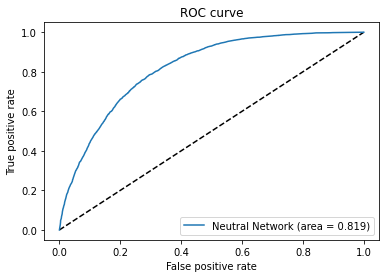

In [11]:
get_performance(X_test,y_test)

###### How does it perform on unseen data?

89/89 [==============================] - 0s 812us/step
False Positive Rate (FPR): [0.         0.26244666 1.        ]
True Positive Rate (TPR): [0.         0.75983146 1.        ]
Area Under the ROC Curve (AUC-ROC): 0.7486924017453289


The accuracy of the neural network is: 0.7487632508833922
The classification error of the neural network is: 0.25123674911660776
The sensitivity of the neural network is: 0.7598314606741573
The precision of the neural network is: 0.7456926257753274
The specificity of the neural network is: 0.7375533428165008
The f1 score of the neural network is: 0.7526956521739129


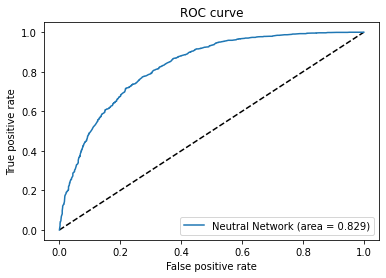

In [12]:
X_unseen = unseen_data[features]
y_unseen = unseen_data["Diabetes_binary"]

get_performance(X_unseen,y_unseen)

<hr>
<hr>

## Conclusion

The feature set selected was based on their correlation coefficient with the target variable - ['HighBP', 'HighChol', 'GenHlth', 'DiffWalk', 'Age','BMI_bins']

The model which performed best in terms of sensitivity had 50 epochs, batch size 32 and binary cross-entropy loss function. This is its performance:


89/89 [==============================] - 0s 851us/step
False Positive Rate (FPR): [0.        0.3428165 1.       ]
True Positive Rate (TPR): [0.        0.8244382 1.       ]
Area Under the ROC Curve (AUC-ROC): 0.7408108507679767


The accuracy of the neural network is: 0.7413427561837456
The classification error of the neural network is: 0.25865724381625443
The sensitivity of the neural network is: 0.824438202247191
The precision of the neural network is: 0.7089371980676329
The specificity of the neural network is: 0.6571834992887624
The f1 score of the neural network is: 0.7623376623376624


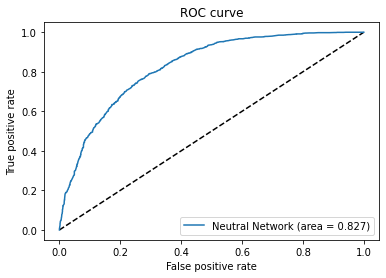

In [22]:
## Results obtained from code above.

X_unseen = unseen_data[features]
y_unseen = unseen_data["Diabetes_binary"]

get_performance(X_unseen,y_unseen)

<hr>